### Movie Rating Analysis

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
movies=pd.read_csv('movies.dat',delimiter='::')
movies.head(2)

,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short


In [38]:
movies.columns = ["ID", "Title", "Genre"]
movies.head(2)

,ID,Title,Genre
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short


In [39]:
# Now let’s import the ratings dataset:
ratings = pd.read_csv("ratings.dat", delimiter='::')
print(ratings.head())

   1  0114508  8  1381006850
0  2   499549  9  1376753198
1  2  1305591  8  1376742507
2  2  1428538  1  1371307089
3  3    75314  1  1595468524
4  3   102926  9  1590148016


In [40]:
ratings.columns = ["User", "ID", "Ratings", "Timestamp"]
print(ratings.head())

   User       ID  Ratings   Timestamp
0     2   499549        9  1376753198
1     2  1305591        8  1376742507
2     2  1428538        1  1371307089
3     3    75314        1  1595468524
4     3   102926        9  1590148016


In [41]:
data=pd.merge(movies,ratings, on=['ID','ID'])
data.head(2)

,ID,Title,Genre,User,Ratings,Timestamp
0,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
1,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579


In [42]:
top_ratings=data['Ratings'].sort_values(ascending=False).head(10)
top_ratings

0         10
98682     10
661398    10
378541    10
771004    10
378540    10
661401    10
378537    10
661404    10
378533    10
Name: Ratings, dtype: int64

In [43]:
# top ten moveis with rating ten
top_moveis=data[data['Ratings']==10]
top_moveis

,ID,Title,Genre,User,Ratings,Timestamp
0,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
1,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
15,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,27589,10,1538187753
18,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,37621,10,1529844360
20,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,39522,10,1437579236
...,...,...,...,...,...,...
908617,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,3040,10,1622966424
908618,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,11908,10,1623004815
908626,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,54886,10,1622766966
908627,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,55241,10,1622416491


In [44]:
top_moveis.shape

(107284, 6)

In [45]:
data.shape

(908632, 6)

In [46]:
data.Ratings.value_counts()

8     219311
7     203476
9     128749
6     118323
10    107284
5      68458
4      27779
3      15258
1      10663
2       9053
0        278
Name: Ratings, dtype: int64

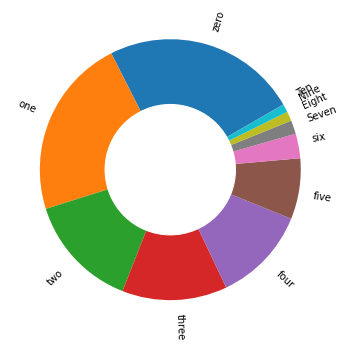

In [24]:
ratings = data["Ratings"].value_counts()
numbers = ratings.index
label=['zero','one','two','three','four','five','six','Seven','Eight','Nine','Ten']
quantity = ratings.values
plt.figure(figsize=(6,6))
plt.pie(quantity,labels=label,rotatelabels=True,startangle=30)
plt.gcf()
circle=plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(circle)
plt.show()

In [25]:
data2 = data.query("Ratings == 10")
data2

,ID,Title,Genre,User,Ratings,Timestamp
0,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
1,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
15,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,27589,10,1538187753
18,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,37621,10,1529844360
20,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,39522,10,1437579236
...,...,...,...,...,...,...
908617,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,3040,10,1622966424
908618,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,11908,10,1623004815
908626,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,54886,10,1622766966
908627,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,55241,10,1622416491


In [26]:
print(data2["Title"].value_counts().head(10))

Joker (2019)                       1479
Interstellar (2014)                1386
1917 (2019)                         820
Avengers: Endgame (2019)            812
The Shawshank Redemption (1994)     707
Gravity (2013)                      653
The Wolf of Wall Street (2013)      581
Hacksaw Ridge (2016)                570
Avengers: Infinity War (2018)       535
La La Land (2016)                   510
Name: Title, dtype: int64


### Number of order prediction

In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv")

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [49]:
df=data.copy()

In [51]:
df.isnull().any()

ID               False
Store_id         False
Store_Type       False
Location_Type    False
Region_Code      False
Date             False
Holiday          False
Discount         False
#Order           False
Sales            False
dtype: bool

In [53]:
df.isnull().any().sum()
# No null value in any column

0

In [56]:
df.head(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12


In [59]:
# Getting duplicates values
df.duplicated().sum()

0

In [61]:
import seaborn as sns

<AxesSubplot:>

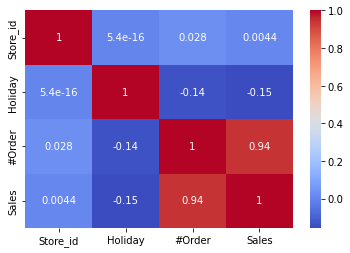

In [62]:
corr=df.corr()
corr
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [63]:
df['Store_Type'].unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [64]:
df['Location_Type'].unique()

array(['L3', 'L2', 'L1', 'L5', 'L4'], dtype=object)

In [65]:
df['Region_Code'].unique()

array(['R1', 'R4', 'R2', 'R3'], dtype=object)

In [66]:
df['Discount'].unique()

array(['Yes', 'No'], dtype=object)

In [67]:
df['Holiday'].unique()

array([1, 0], dtype=int64)

In [68]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
ss=StandardScaler()
le=LabelEncoder()

In [69]:
df.head(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12


In [70]:
df['Store_Type']=le.fit_transform(df['Store_Type'])
df['Location_Type']=le.fit_transform(df['Location_Type'])
df['Region_Code']=le.fit_transform(df['Region_Code'])
df['Discount']=le.fit_transform(df['Discount'])

In [71]:
# Now We can see that labels have been encoded
df.head(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,0,2,0,2018-01-01,1,1,9,7011.84
1,T1000002,253,3,1,0,2018-01-01,1,1,60,51789.12


In [73]:
df=df[['Store_Type','Location_Type','Region_Code','Holiday','Discount','#Order','Sales']]

In [74]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [75]:
x=ss.fit_transform(x)

In [76]:
x[0:3]

array([[-0.92021484,  0.77942573, -1.11825327,  2.56675579,  1.11106042,
        -1.9432515 ],
       [ 1.48464256, -0.03573298, -1.11825327,  2.56675579,  1.11106042,
        -0.26932753],
       [ 0.68302343, -0.03573298, -1.11825327,  2.56675579,  1.11106042,
        -0.86012423]])

In [81]:
y.shape

(188340,)

In [78]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    loss='linear',
    random_state=None,)

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [86]:
ytrain.shape

(131838,)

In [87]:
adb.fit(xtrain,ytrain)

AdaBoostRegressor()

In [88]:
adb.score(xtrain,ytrain)

0.8565991426967401

In [89]:
adb.score(xtest,ytest)

0.8580714348472462

In [90]:
ypred=adb.predict(xtest)

In [93]:
from sklearn.metrics import mean_absolute_error as mae
mae(ytest,ypred)

5354.948412743646